In [5]:
import pandas as pd
import matplotlib as plt
import re

associativity = [1, 2, 4]

%matplotlib inline

In [6]:
def read_stats(stat):
    values = []
    
    for size in associativity:
        with open(f"/home/nivetha/5SIA0-ECA-Assignments/eeg/7/7.3/{size}/stats.txt") as f:
            line = f.readline()
            while line:
                line = re.sub(r"\s+#.*$", "", line)
                if re.match(stat, line):
                    value = float(re.split(r"\s+", line)[1])
                    values.append(value)
                line = f.readline()
                
    return pd.Series(list(values), name=stat)

   associativity  simulation_time
0              1         0.089645
1              2         0.087784
2              4         0.087535


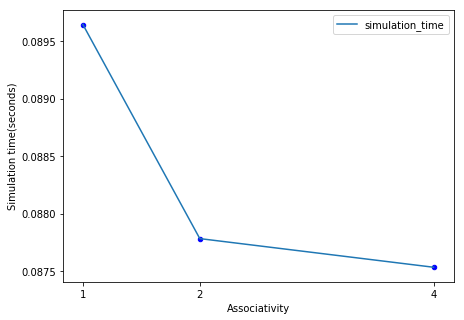

In [8]:
# Cache size vs simulation seconds
associativity = pd.Series(associativity, name='associativity')
simulation_time = read_stats("sim_seconds").rename("simulation_time")

df = pd.concat([associativity, simulation_time], axis=1)

ax = df.plot(kind='line', x='associativity', figsize=(7, 5))
df.plot(kind='scatter', x='associativity', y='simulation_time', c='blue', ax=ax)
ax.set_xlabel('Associativity')
ax.set_ylabel('Simulation time(seconds)')
ax.set_xticks(df.associativity)